# ***As a loan manager, you need to identify risky loan applications to achieve 
a lower loan default rate. This process of classifying customers into a group 
of potential and non-potential customers or safe or risky loan applications 
is known as a classification problem.

In [1]:
cd D:\machine learning tutorial\dataset for code

D:\machine learning tutorial\dataset for code


In [28]:
import pandas as pd
import numpy as np
df=pd.read_csv('decision classifier diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [29]:
#putting the column name
df.columns=['pregnant','glucose','bp','skin','insulin'
                            ,'bmi','pedigree','age','label']
df.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [30]:
#split the dataset into features and label
x=df.iloc[:,0:7]
print(x)
y=df.iloc[:,8]
#print(y)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree
0           1       85  66    29        0  26.6     0.351
1           8      183  64     0        0  23.3     0.672
2           1       89  66    23       94  28.1     0.167
3           0      137  40    35      168  43.1     2.288
4           5      116  74     0        0  25.6     0.201
..        ...      ...  ..   ...      ...   ...       ...
762        10      101  76    48      180  32.9     0.171
763         2      122  70    27        0  36.8     0.340
764         5      121  72    23      112  26.2     0.245
765         1      126  60     0        0  30.1     0.349
766         1       93  70    31        0  30.4     0.315

[767 rows x 7 columns]


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [34]:
#test the acuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.696969696969697

# ***Visualizing Decision Trees

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv("decision classifier visualize.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


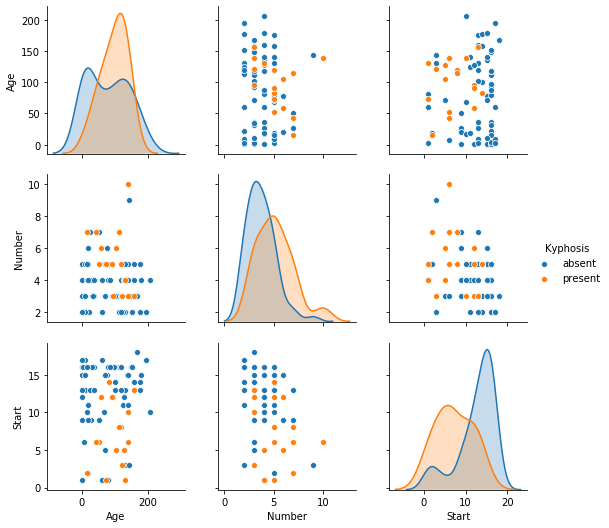

In [4]:
#how the data distributed that we will see using pairplot
sns.pairplot(df,hue="Kyphosis")

In [5]:
#split the data into features (x) and label (y)
x=df.drop("Kyphosis",axis=1)
y=df["Kyphosis"]
#print(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('accuracy score        : ',accuracy_score(y_test,y_pred))
print('classification report : ')
print(classification_report(y_test,y_pred))
print('confusion matrix : ')
print(confusion_matrix(y_test,y_pred))

accuracy score        :  0.76
classification report : 
              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

confusion matrix : 
[[17  1]
 [ 5  2]]


In [9]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
# do not support import pydot
features=list(df.columns[1:])
features

C:\Users\SOHAG\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['Age', 'Number', 'Start']

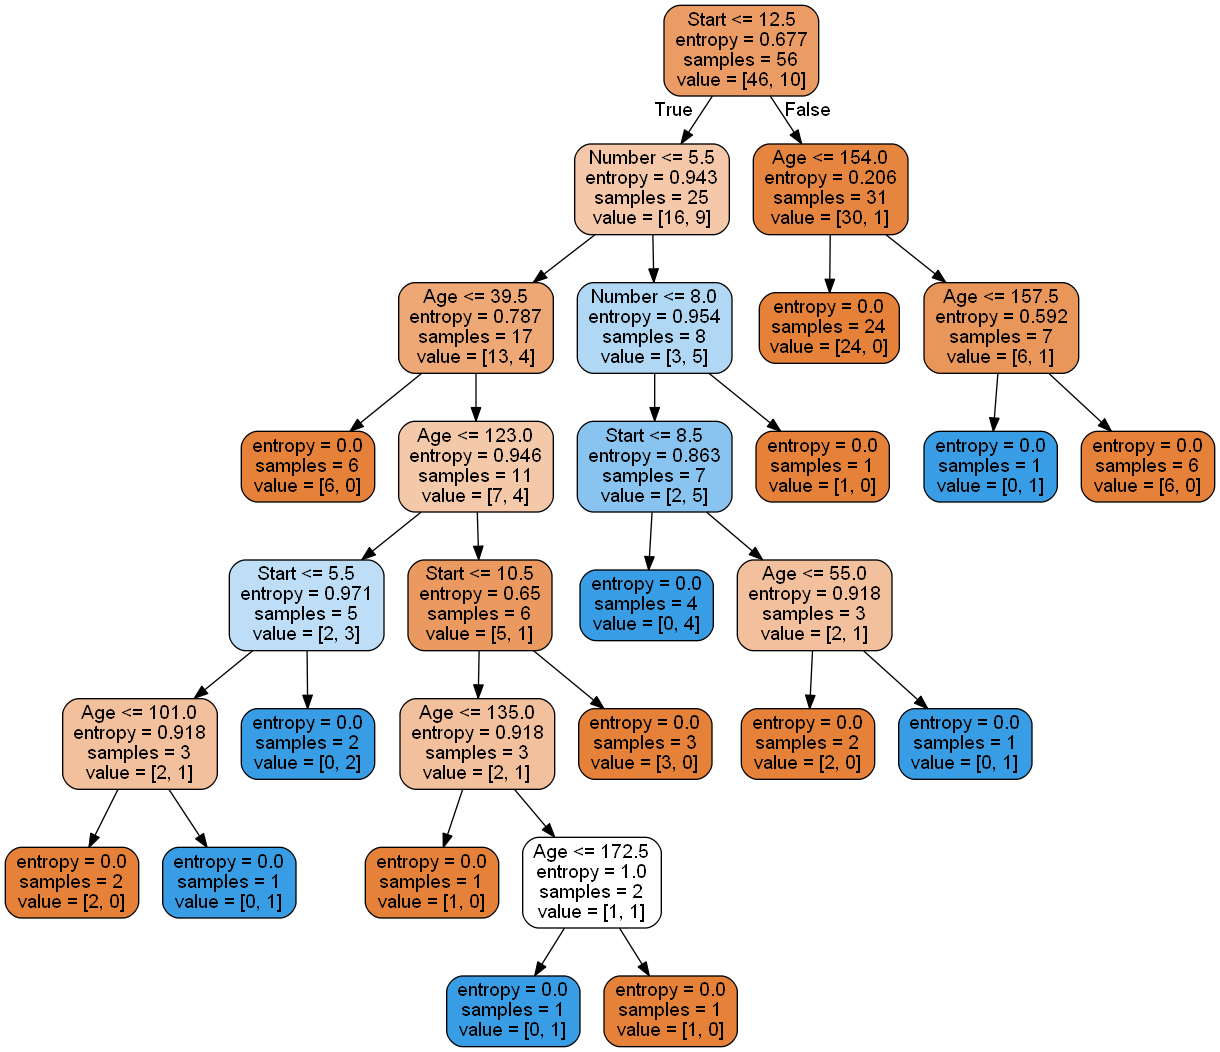

In [11]:
#here it is must to give dot_data otherwise we get error that is 
#AttributeError: module 'pydotplus' has no attribute 'graph_from_dott_data'
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dott_data.getvalue())
Image(graph.create_png())
#do not support Image(graph[0].create_png())


C:\Users\SOHAG\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


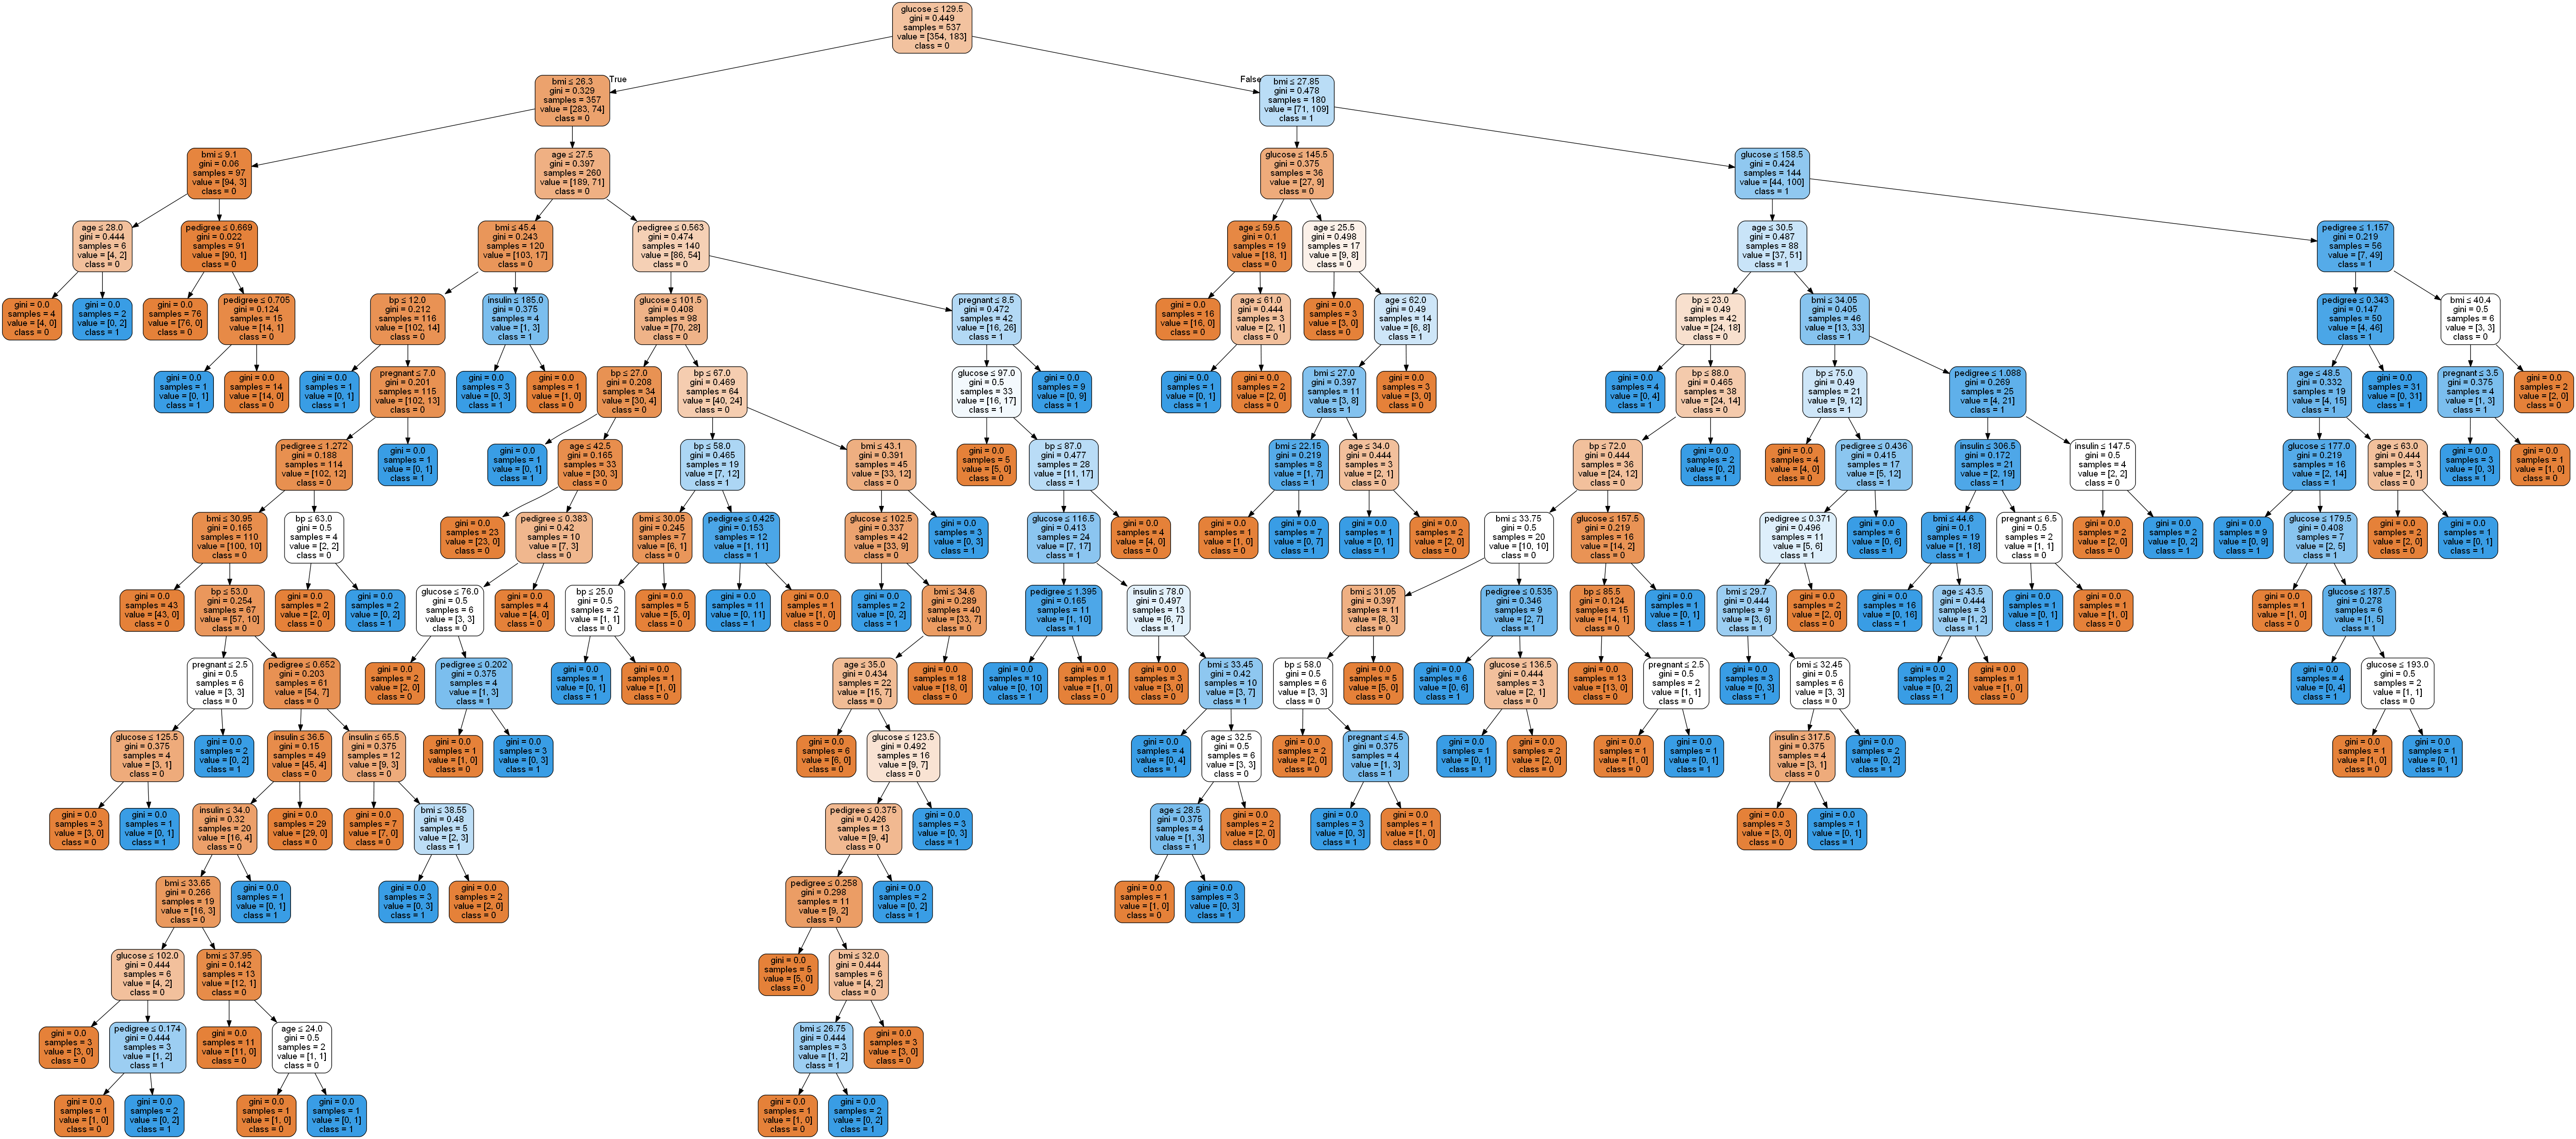

In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [17]:
import pydotplus